<a href="https://colab.research.google.com/github/cruzmarcela02/ciencia-de-datos/blob/main/TP1-aerolineas/colab-analisis/pasajeros_servicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### CARGA ARCHIVO

In [ ]:
# Cargamos archivos:
# 1. https://drive.google.com/file/d/1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ/view?usp=drive_link
id='1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('filtered_customer_booking.csv')

In [ ]:
 # 2. https://drive.google.com/file/d/1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY/view?usp=drive_link
id='1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('customer_airways_data.csv')

In [ ]:
# 3. https://drive.google.com/file/d/132CgYVqb-uygkp8wM80ur_cghtUDaEI7/view?usp=sharing
id='132CgYVqb-uygkp8wM80ur_cghtUDaEI7'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('cleaned-reviews.csv')

In [ ]:
# 4. https://drive.google.com/file/d/14GjEtEbD2al063LU0thzp-jRhuJKgvql/view?usp=drive_link
id='14GjEtEbD2al063LU0thzp-jRhuJKgvql'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('airline_data.csv')

# **Abrimos los DataFrame**

In [ ]:
archivo_uno = pd.read_csv('filtered_customer_booking.csv')
archivo_uno

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
archivo_dos = pd.read_csv("customer_airways_data.csv", encoding='iso-8859-1')
archivo_dos

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
archivo_tres = pd.read_csv('cleaned-reviews.csv', parse_dates=['date'])
archivo_tres

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


In [ ]:
archivo_cuatro = pd.read_csv('airline_data.csv', parse_dates=['date'])
archivo_cuatro

,Unnamed: 0,reviews,rates,date,country
0,0,✅ Trip Verified | Excellent service both on th...,5.00,24th January 2023,United Kingdom
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9.00,24th January 2023,United Kingdom
2,2,✅ Trip Verified | A really excellent journey....,9.00,23rd January 2023,United Kingdom
3,3,✅ Trip Verified | This flight was one of the ...,9.00,21st January 2023,United Kingdom
4,4,Not Verified | It seems that there is a race t...,2.00,19th January 2023,United States
...,...,...,...,...,...
3413,3413,Flew British Airways from Sydney to Venice on ...,6.00,20th May 2014,Australia
3414,3414,Recently for our honeymoon we took advantage o...,10.00,19th May 2014,United Kingdom
3415,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,1.00,18th May 2014,United Kingdom
3416,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,4.00,18th May 2014,United Kingdom


# **LIMPIEZA**

In [ ]:
# Limpiamos los  de booking_origin
filtro_origin = archivo_dos.loc[archivo_dos.booking_origin != '(not set)']
filtro_origin

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
# Filtramos los vuelos comprados por internet
filtro_channel = filtro_origin.loc[filtro_origin.sales_channel == 'Internet']
filtro_channel

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
passengers_duration_wants = filtro_channel[['num_passengers','flight_duration', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']]
passengers_duration_wants

,num_passengers,flight_duration,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
0,2,5.52,1,0,0
1,1,5.52,0,0,0
2,2,5.52,1,1,0
3,1,5.52,0,0,1
4,2,5.52,1,0,1
...,...,...,...,...,...
49995,2,5.62,1,0,1
49996,1,5.62,0,0,0
49997,1,5.62,0,0,1
49998,1,5.62,1,0,1


# La gente que toma vuelos largos, suele seleccionar mas preferencias de servicio (como el asiento, comida y valija)

# - **Vuelos largos**

In [ ]:
vuelos_largos = passengers_duration_wants.loc[passengers_duration_wants.flight_duration >= 8]
vuelos_largos

In [ ]:
vuelos_largos['Cantidad de servicios'] = vuelos_largos.wants_extra_baggage + vuelos_largos.wants_preferred_seat + vuelos_largos.wants_in_flight_meals
vuelos_largos

In [ ]:
# La cantidad de pasajeros que pidieron los 3 servicios
pasajeros_largos_3 = vuelos_largos[vuelos_largos['Cantidad de servicios'] == 3]['num_passengers'].sum()
# La cantidad de pasajeros que pidieron 2 servicios
pasajeros_largos_2 = vuelos_largos[vuelos_largos['Cantidad de servicios'] == 2]['num_passengers'].sum()
# La cantidad de pasajeros que pidieron 1 servicio
pasajeros_largos_1 = vuelos_largos[vuelos_largos['Cantidad de servicios'] == 1]['num_passengers'].sum()
# La cantidad de pasajeros que viajaron sin ningun servicio
pasajeros_largos_0 = vuelos_largos[vuelos_largos['Cantidad de servicios'] == 0]['num_passengers'].sum()

cant_pasajeros_servicios_vuelos_largos = vuelos_largos[vuelos_largos['Cantidad de servicios'] != 0]['num_passengers'].sum()

# - **Vuelos cortos**

In [ ]:
vuelos_cortos = passengers_duration_wants.loc[passengers_duration_wants.flight_duration < 6]
vuelos_cortos

In [ ]:
vuelos_cortos['Cantidad de servicios'] = vuelos_cortos.wants_extra_baggage + vuelos_cortos.wants_preferred_seat + vuelos_cortos.wants_in_flight_meals
vuelos_cortos

In [ ]:
# La cantidad de pasajeros que pidieron los 3 servicios
pasajeros_cortos_3 = vuelos_cortos[vuelos_cortos['Cantidad de servicios'] == 3]['num_passengers'].sum()
# La cantidad de pasajeros que pidieron 2 servicios
pasajeros_cortos_2 = vuelos_cortos[vuelos_cortos['Cantidad de servicios'] == 2]['num_passengers'].sum()
# La cantidad de pasajeros que pidieron 1 servicio
pasajeros_cortos_1 = vuelos_cortos[vuelos_cortos['Cantidad de servicios'] == 1]['num_passengers'].sum()
# La cantidad de pasajeros que pidieron 1 servicio
pasajeros_cortos_0 = vuelos_cortos[vuelos_cortos['Cantidad de servicios'] == 0]['num_passengers'].sum()

cant_pasajeros_servicios_vuelos_cortos = vuelos_cortos[vuelos_cortos['Cantidad de servicios'] != 0]['num_passengers'].sum()

# Grafico

In [ ]:
# Creamos un df con los valores obtenidos de los pasajeros que utilizan los 3 servicios en los rangos horarios
tipo_vuelo = ['Vuelos Largos', 'Vuelos Cortos']
cant_pasajeros_servicios = {
    'tipo_vuelo': tipo_vuelo,
    'cant_pasajeros': [cant_pasajeros_servicios_vuelos_largos, cant_pasajeros_servicios_vuelos_cortos]
}
cant_pasajeros_servicios_df = pd.DataFrame(cant_pasajeros_servicios)

In [ ]:
[cant_pasajeros_servicios_vuelos_largos, cant_pasajeros_servicios_vuelos_cortos]

[26306, 14810]

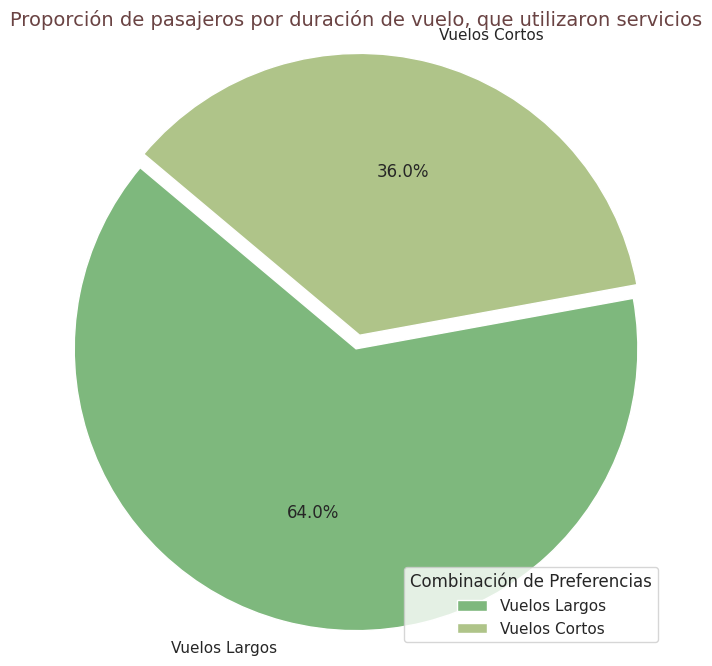

In [ ]:
# Extraigo la cantidad de pasajero que eligen servicios y el tipo de vuelo al que pertenece
vuelos_cortos = cant_pasajeros_servicios_df.tipo_vuelo
cant_pasajeros = cant_pasajeros_servicios_df.cant_pasajeros

# Configurar colores para el gráfico de torta
mi_gama = ("#7EB87D", "#AFC489")

# Desplazamiento
myexplode = [0.05, 0]

# Graficar el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(cant_pasajeros, labels=vuelos_cortos, colors=mi_gama, autopct='%1.1f%%', startangle=140, explode= myexplode)
plt.title('Proporción de pasajeros por duración de vuelo, que utilizaron servicios', loc='center', color='#6a4343', size=14)
plt.axis('equal')  # Asegurar que el gráfico de torta sea un círculo
plt.legend(title='Combinación de Preferencias', loc='lower right')
plt.show()

# Graficoa

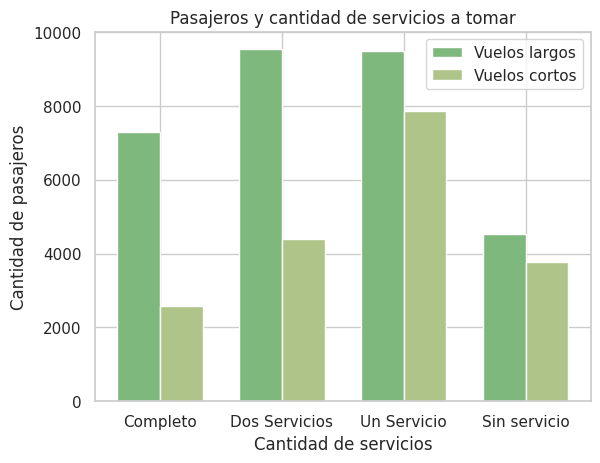

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo
cant_servicios = ['Completo', 'Dos Servicios', 'Un Servicio', 'Sin servicio']
cant_largos = [pasajeros_largos_3, pasajeros_largos_2, pasajeros_largos_1, pasajeros_largos_0]  # Primer conjunto de datos
cant_cortos = [pasajeros_cortos_3, pasajeros_cortos_2, pasajeros_cortos_1, pasajeros_cortos_0]    # Segundo conjunto de datos

# Configurar el ancho de las barras
ancho_barra = 0.35

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar las barras para el primer conjunto de datos
ax.bar(cant_servicios, cant_largos, width=ancho_barra, label='Vuelos largos', color= mi_gama[0])

# Graficar las barras para el segundo conjunto de datos
ax.bar([x + ancho_barra for x in range(len(cant_servicios))], cant_cortos, width=ancho_barra, label='Vuelos cortos', color= mi_gama[1])

# Etiquetas y título
ax.set_xlabel('Cantidad de servicios')
ax.set_ylabel('Cantidad de pasajeros')
ax.set_title('Pasajeros y cantidad de servicios a tomar')
ax.set_xticks([x + ancho_barra / 2 for x in range(len(cant_servicios))])
ax.set_xticklabels(cant_servicios)
ax.legend()

# Mostrar el gráfico
plt.show()
